# ***BIG MART SALES PREDICTION***

1. Load the data and Load all libraries
2. Data Audit (Shape of the data, Missing values, Inconsistencies)
3. Data Preparation (Missing values, Inconsistency, remove redundancy)        
4. Data Visualization (boxplots, frequency plots)
5. Data Analysis :
        1. Uni-Variate (Measures of Central Tendency, Measures of Dispersion)
        2. Bi-Variate (Covariance & Correlation/ Chi-Square)
        3. Multi-Variate (Linear Regression)   







# **Importing Libraries and Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train = pd.read_csv("/content/Train Data.csv")
test = pd.read_csv("/content/Test Data.csv")

# ***Data Audit***

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


*  **Item_Weight** and **Outlet_Size** have some missing values.
*  **Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type** and **Outlet_Type** are Object Types so that has to be changed before putting data on the test.
*  **Item_Weight, Item_Visibility, Item_MRP** and **Item_Outlet_Sales** are float type variables that are they are of large values and highly continuous in nature.

In [ ]:
train.shape

(8523, 12)

### Summary Statistics

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.skew()

<ipython-input-6-1d3a3c99b9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

Both **Item_Visibility** and **Item_Outlet_Sales** are highly skewed and are hetrogeneous in nature.

# **Data Preparation**

### Plots of Object Types

<Axes: >

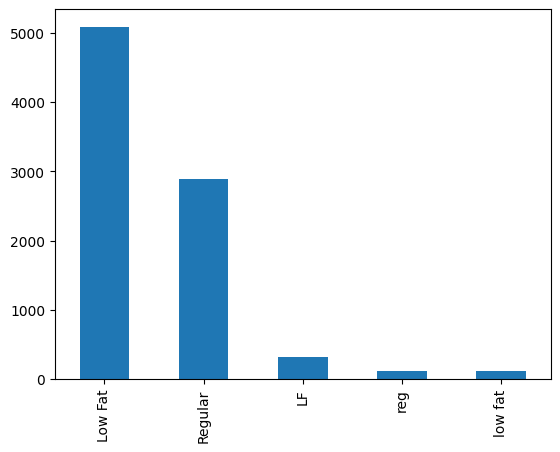

In [ ]:
train['Item_Fat_Content'].value_counts().plot(kind='bar')

Low Fat, LF and low fat are same while reg and Regular are same i.e. data is inconsistent

<Axes: >

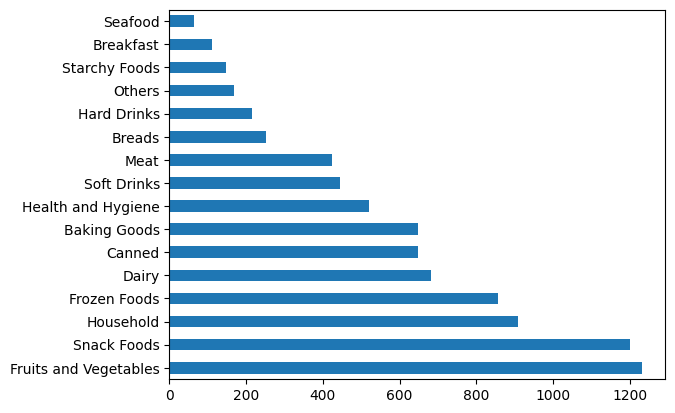

In [ ]:
train['Item_Type'].value_counts().plot(kind='barh')

Cardinality is very high (Number of products sold)

<Axes: >

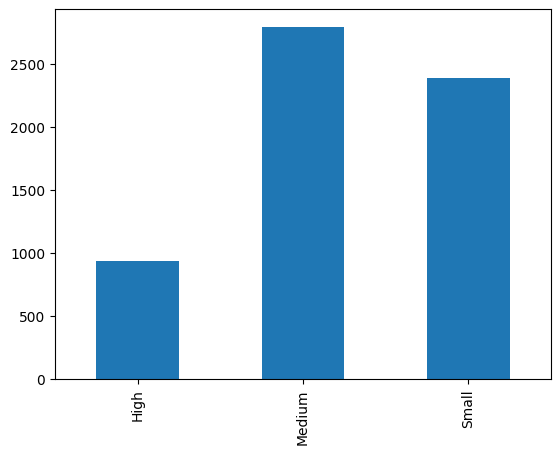

In [ ]:
train['Outlet_Size'].value_counts().sort_index().plot(kind='bar')

<Axes: >

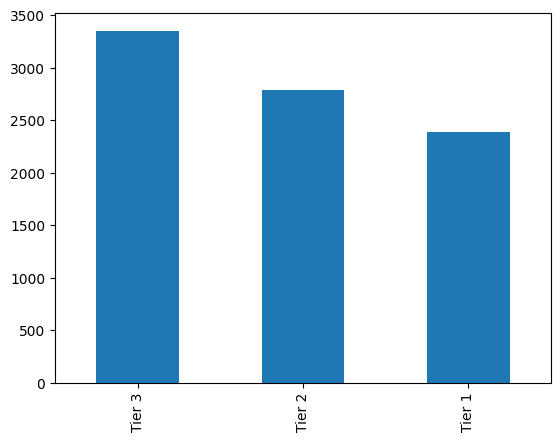

In [ ]:
train['Outlet_Location_Type'].value_counts().plot(kind='bar')

<Axes: >

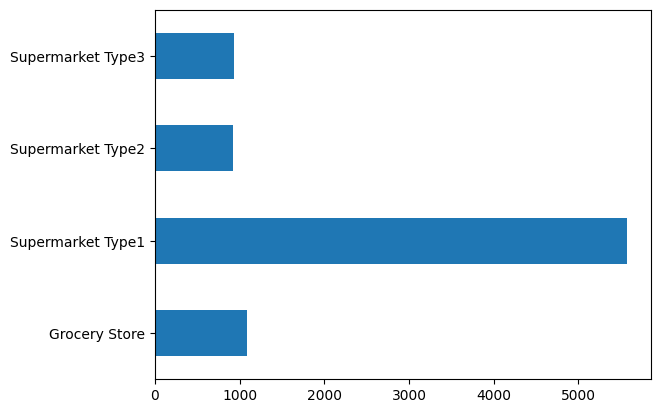

In [ ]:
train['Outlet_Type'].value_counts().sort_index().plot(kind='barh')

### Data Cleaning

In [ ]:
train['Outlet_Establishment_Year'].head()

0    1999
1    2009
2    1999
3    1998
4    1987
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
def data_prep(train):
  # Handle Missing Values
  train['Item_Weight'] = np.where(train['Item_Weight'].isna(), train['Item_Weight'].median(skipna=True), train['Item_Weight'])
  train['Outlet_Size'] = np.where(train['Outlet_Size'].isna(), train['Outlet_Size'].mode(), train['Outlet_Size'])
  # Handle Inconsistent Data
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF','Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat','Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg','Regular')
  # Making New Variables
  train['Years_of_Business'] = 2023 - train['Outlet_Establishment_Year']
  return train

In [ ]:
data_prep(train)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_of_Business
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,36
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,21
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,19
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,14


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Years_of_Business          8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

# ***Data Visualization***

<Axes: >

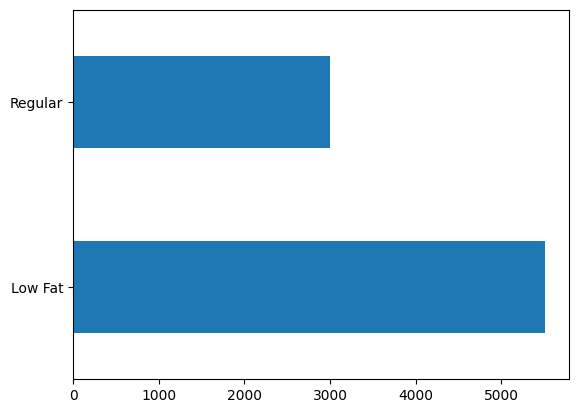

In [ ]:
train['Item_Fat_Content'].value_counts().plot(kind='barh')

<Axes: ylabel='Frequency'>

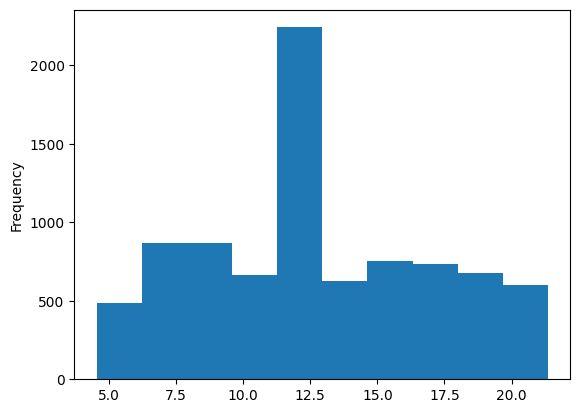

In [ ]:
train['Item_Weight'].plot(kind='hist')

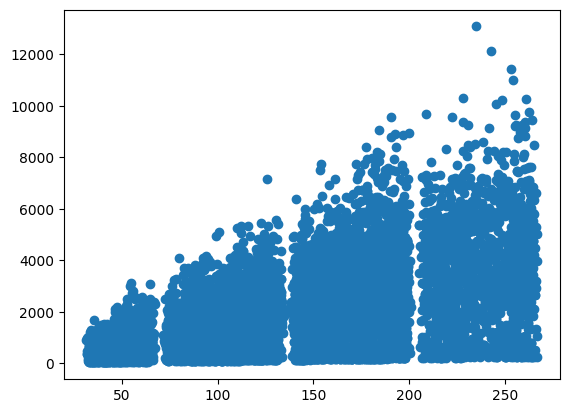

In [ ]:
plt.scatter(train['Item_MRP'],train['Item_Outlet_Sales'])

<Axes: ylabel='Outlet_Establishment_Year,Outlet_Location_Type'>

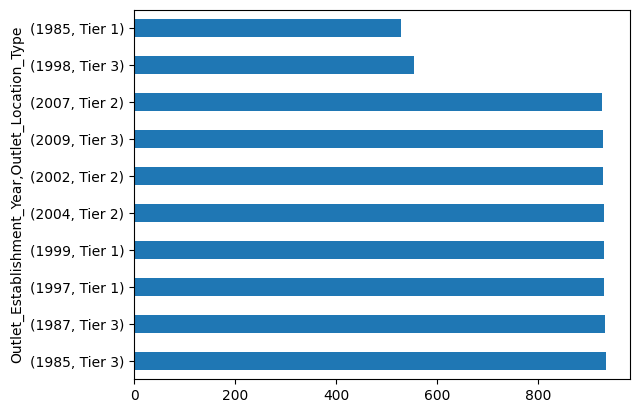

In [ ]:
train.loc[:,['Outlet_Establishment_Year','Outlet_Location_Type']].value_counts().plot(kind='barh')

In [ ]:
newdf = train.loc[:,['Item_Outlet_Sales','Outlet_Location_Type']]
df1 = newdf.set_index('Outlet_Location_Type')

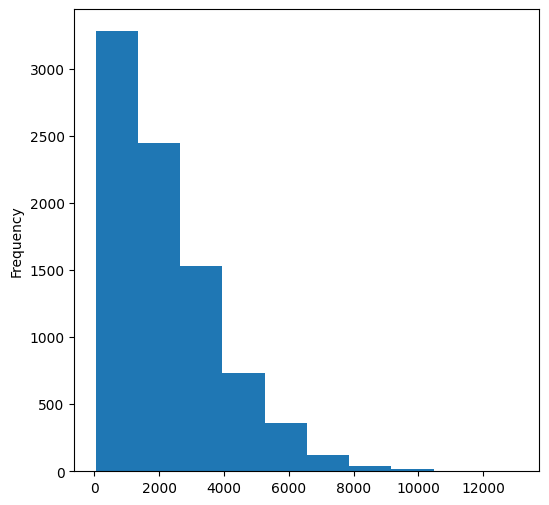

In [ ]:
plt.figure(figsize=(6,6))
df1['Item_Outlet_Sales'].plot(kind='hist')
plt.show()

# ***Data Analysis***

## Uni-Variate

In [ ]:
train.mean()

<ipython-input-22-b2f34c448aca>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.mean()


Item_Weight                    12.813420
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
Years_of_Business              25.168133
dtype: float64

In [ ]:
train.median()

<ipython-input-23-4f4a9c1154f5>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.median()


Item_Weight                    12.600000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
Years_of_Business              24.000000
dtype: float64

In [ ]:
Range = train.describe()['Item_Outlet_Sales'][7] - train.describe()['Item_Outlet_Sales'][3]
Range

13053.674799999999

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Years_of_Business
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914,25.168133
std,4.22724,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.55500,0.000000,31.290000,1985.000000,33.290000,14.000000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400,19.000000
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000,24.000000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400,36.000000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800,38.000000


In [ ]:
IQR = train.describe()['Item_Outlet_Sales'][6] - train.describe()['Item_Outlet_Sales'][4]
IQR

2267.049

## Bi-Variate 

### Covariance & Correlation (For Continuous Data)

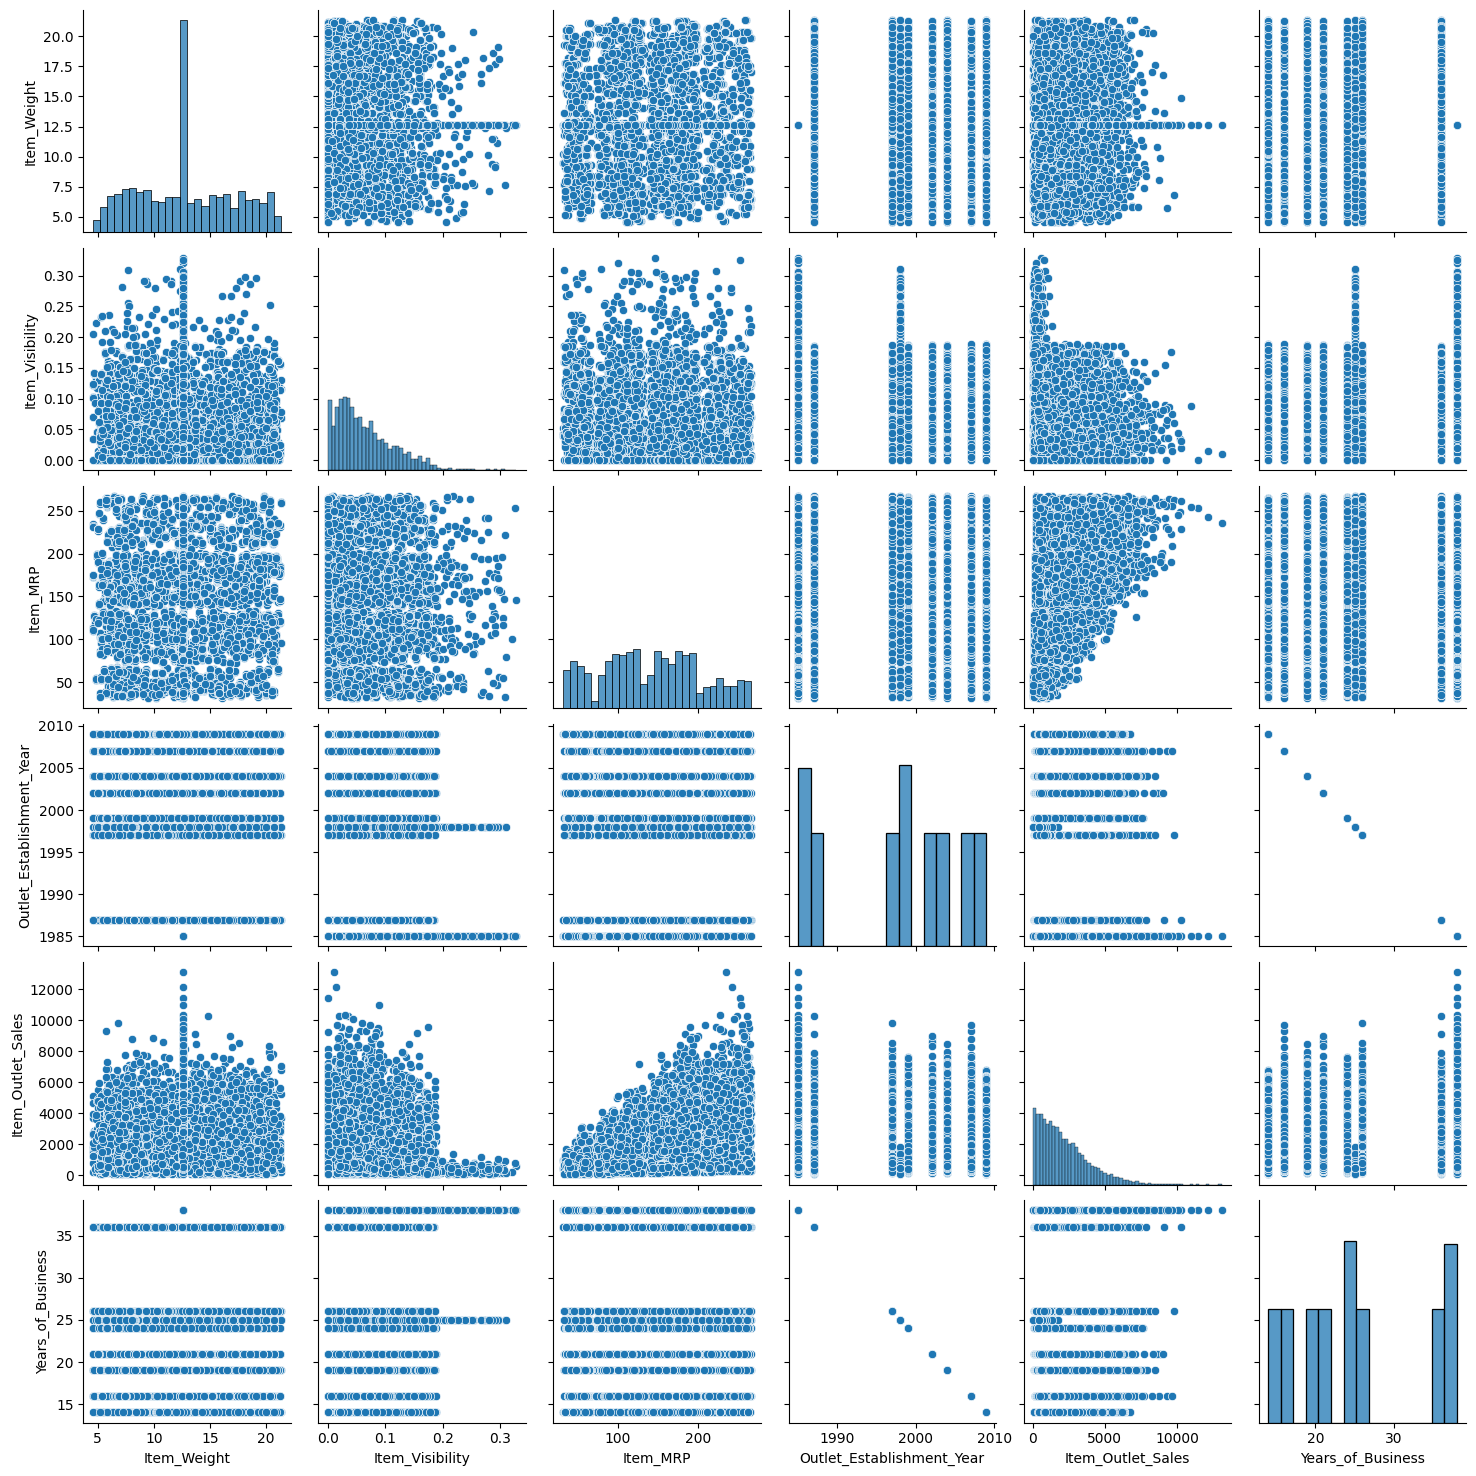

In [ ]:
sns.pairplot(train)

<ipython-input-28-1df3d0bfd6af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

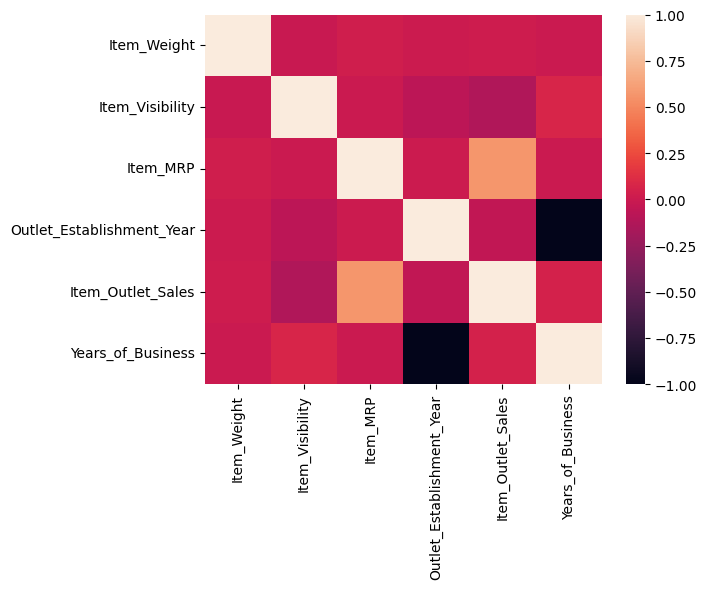

In [ ]:
sns.heatmap(train.corr())

In [ ]:
pd.crosstab(train['Outlet_Location_Type'],train['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


### Chi-Square (For Both Categorical and Continuous Data)

In [ ]:
from scipy.stats.contingency import chi2_contingency

In [ ]:
def chi_sq(var1, var2):
  contigency_table = pd.crosstab(var1,var2)
  _,p,_,_ = chi2_contingency(contigency_table)
  if p<0.05:
    print('The relationship is strong')
  else:
    print('The relationship is weak')
  return contigency_table

In [ ]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
chi_sq(train['Outlet_Size'], train['Outlet_Location_Type'])

The relationship is strong


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


According to our general thinking Tier 1 cities should host maximum of high-size outlets but the data shows otherwise.

One possible reason for high and medium size outlets are present in tier 3 cities is because of the area that is there.

In [ ]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
chi_sq(train['Outlet_Location_Type'], train['Outlet_Type'])

The relationship is strong


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


Tier 2 cities only have a certain type of super market while tier 3 cities have all 4 types of stores.
From above we can also see that maybe Supermarket 2 and 3 are majorly the large area shops.

## Multi-Variate (Linear Regression Model)

### Removing Unwanted Data

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_of_Business'],
      dtype='object')

In [ ]:
train.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [ ]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Years_of_Business'],
      dtype='object')

### Making X and Y

In [ ]:
x = train.drop(['Item_Outlet_Sales'], axis=1)

In [ ]:
y = train['Item_Outlet_Sales']

In [ ]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_of_Business
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,24
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,14
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,24
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,25
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,36


In [ ]:
print(x.shape)
print(y.shape)

(8523, 9)
(8523,)


### Encoding Object/Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
train['Item_Fat_Content'].dtype

dtype('O')

In [ ]:
for i in x.columns:
  if x[i].dtype == 'object':
    x[i] = le.fit_transform(x[i])

In [ ]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_of_Business
0,9.30,0,0.016047,4,249.8092,1,0,1,24
1,5.92,1,0.019278,14,48.2692,1,2,2,14
2,17.50,0,0.016760,10,141.6180,1,0,1,24
3,19.20,1,0.000000,6,182.0950,1,2,0,25
4,8.93,0,0.000000,9,53.8614,0,2,1,36


In [ ]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

### Train Test Split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(6818, 9)
(6818,)
(1705, 9)
(1705,)


### Linear Regression

**Model Fitting**

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_train_lr = lr.predict(x_train)
pred_val_lr = lr.predict(x_val)

In [ ]:
lr.intercept_

-245.5456355670658

In [ ]:
lr.coef_

array([-1.13726234e-01,  5.84239364e+01, -1.40185422e+03, -2.84093096e+00,
        1.57264471e+01, -3.30133181e+02, -4.17412800e+02,  9.93463276e+02,
       -1.25046840e+00])

**Model Evaluation** (RMSE & R-SQUARED)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train_lr))
r_sq_train = r2_score(y_train, pred_train_lr)

In [ ]:
rmse_val = np.sqrt(mean_squared_error(y_val, pred_val_lr))
r_sq_val = r2_score(y_val, pred_val_lr)

In [ ]:
print("the RMSE for the train data is: ", round(rmse_train,2))
print("the RMSE for the validation data is: ", round(rmse_val,2))

print("The R-Squared Value for the train data is: ", round(r_sq_train,2))
print("The R-Squared Value for the validation data is: ", round(r_sq_val,2))

the RMSE for the train data is:  1202.95
the RMSE for the validation data is:  1173.02
The R-Squared Value for the train data is:  0.51
The R-Squared Value for the validation data is:  0.52


**Application on Test Data**

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
data_prep(test)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_of_Business
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,24
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,25
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,38
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,26
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,14
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,21
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,16


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  Years_of_Business          5681 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 532.7+ KB


In [ ]:
test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [ ]:
for i in test.columns:
  if test[i].dtype == 'object':
    test[i] = le.fit_transform(test[i])

In [ ]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_of_Business
0,20.750,0,0.007565,13,107.8622,1,0,1,24
1,8.300,1,0.038428,4,87.3198,1,1,1,16
2,14.600,0,0.099575,11,241.7538,1,2,0,25
3,7.315,0,0.015388,13,155.0340,1,1,1,16
4,12.500,1,0.118599,4,234.2300,1,2,3,38


In [ ]:
pred_test_lr = lr.predict(test)

In [ ]:
pred_test_lr

array([2034.16568005, 1345.84066338, 2187.66206892, ..., 1714.59202286,
       3403.76367894, 1131.03775394])